
# Capstone Project: Customer Segmentation for Retail Marketing Strategy

## Project Overview
The goal of this project is to enhance the marketing strategy of a retail company by segmenting customers based on their purchasing behavior. The objective is to identify distinct customer groups, which can then be targeted with tailored promotions and product offerings, ultimately increasing customer satisfaction and driving sales growth.

### Problem Statement:
How can we identify distinct customer groups based on their purchasing behavior to tailor marketing strategies and improve sales?

## Data Used
The dataset used for this analysis is a transaction dataset from a retail store, which includes various attributes such as:
- **Customer Demographics**: Age, Gender, Customer Type (Member or Normal)
- **Transaction Details**: Product line, Quantity, Unit price, Total value, Payment method, Date, and Time of purchase
- **Customer Feedback**: Rating provided by the customer

For this exercise, the publicly available data, Supermarket Sales data from Kaggle was used.  https://www.kaggle.com/datasets/markmedhat/supermarket-sales

### Key Variables:
- **Invoice ID**: Unique transaction identifier
- **Branch**: Location of the store
- **City**: The city where the transaction occurred
- **Total**: Total transaction value
- **Quantity**: Number of items purchased
- **Rating**: Customer rating for the transaction
- **Payment**: Payment method used (Cash, Credit card, Ewallet)
- **Product Line**: Type of product purchased

## Data Cleaning and Preprocessing
- The dataset had no missing values, so no imputation was required.
- Categorical columns were retained for segmentation (such as Gender, Product Line, Payment method).
- Numerical features such as Total and Quantity were scaled using **StandardScaler** for consistency in clustering.

## Exploratory Data Analysis (EDA)
Several visualizations were created to understand the distribution and relationships between key variables:
- Distribution of **Total Transaction Value** and **Quantity Purchased**
- **Total vs. Quantity**: Positive correlation between the total transaction value and the quantity purchased.
- **Customer Ratings by Payment Method**: Customers using Ewallet tend to provide higher ratings.
- **Distribution by Product Line**: Some product lines like Health and Beauty had more transactions than others.

## Clustering Analysis
Two clustering methods were applied to identify customer segments based on purchasing behavior:

### 1. **K-Means Clustering**:
- The optimal number of clusters (K=4) was determined using the **Elbow Method**.
- A **Silhouette Score** of 0.44 was obtained, suggesting moderate separation between the clusters.
- K-means clustering provided 4 distinct customer segments based on Total and Quantity purchased.

### 2. **DBSCAN Clustering**:
- **DBSCAN** was applied with parameters **epsilon=0.5** and **min_samples=5**.
- No outliers were identified, as all transactions were assigned to clusters.
- DBSCAN identified groups with varying densities, providing a different perspective on customer segmentation.

## Deviations from Original Capstone Description:
- The **original description** suggested incorporating **demographic data** (such as age, gender, and location) for segmentation. While the dataset includes this data, only **Total** and **Quantity** were used for clustering in this analysis. This is due to the focus on purchasing behavior for clustering, and demographic features could be integrated later for more advanced segmentation.
- The original description mentioned using K-means and DBSCAN techniques, which were both implemented as per the instructions.
- The data did not include any features related to customer **website interactions** or **responses to previous marketing campaigns**, which were mentioned in the initial description. This was not addressed due to the nature of the available dataset.
- A **Silhouette Score** (not learned in this class, but have learned in other forums) was used.  It is a measure of how well-defined the clusters are, providing an evaluation of the quality of the clustering results. It ranges from -1 to +1, where:  +1 indicates that the data points are well clustered (i.e., points are very close to their own cluster, and far from other clusters). 0 means that the data points are on or very close to the decision boundary between two clusters, making it unclear whether they belong to one or the other.  -1 suggests that the data points may have been assigned to the wrong cluster (i.e., they are closer to a different cluster than their own).
        
- **KMEANS** and **DBSCAN** were not used for demographic segmentation, as both are used for numerical features.  Since demography is a categorical variable, other models will be utilized in a future version (TBD). 

## Conclusion
The analysis and clustering of customer transactions provide meaningful insights into customer behavior that can significantly enhance the retail company's marketing strategy. By focusing on the purchasing behavior (i.e., total spend and quantity purchased), customer segments have been identified that offer actionable opportunities for personalized marketing and product offerings.

**Key Findings**:

- Purchasing Behavior and Customer Preferences:
Total Transaction Value and Quantity Purchased are key indicators of customer spending patterns. Most customers tend to make purchases with a moderate quantity (between 5 to 8 items), leading to a fairly consistent total transaction value. However, a small subset of customers makes larger purchases, which could indicate high-value or frequent buyers.
This variance in transaction value provides an opportunity for the company to target high-value customers (those with larger transaction totals) with special offers, loyalty programs, or exclusive product lines.

- Payment Method and Customer Satisfaction:
Customers using Ewallet tend to provide higher ratings, indicating a positive relationship between the payment method and customer satisfaction. This may suggest that customers who use digital payment methods (which often require more trust and ease of use) are more likely to have a favorable experience. This insight could guide the marketing team to offer more incentives for Ewallet users, such as discounts or rewards.
In contrast, customers using Cash and Credit Cards show a broader range of satisfaction, which may imply the need for improved customer service or promotions targeting these payment methods.

- Product Preferences and Customer Segmentation:
The segmentation analysis revealed that certain product lines such as Health and Beauty and Electronic Accessories dominate the customer transactions. These product lines are likely driving higher sales, and marketing efforts could focus on increasing the visibility of these categories through targeted promotions.
On the other hand, product lines like Sports and Travel or Home and Lifestyle show fewer transactions, which could suggest the opportunity to cross-sell or offer targeted discounts to boost interest in these categories.

- Customer Segments for Targeted Marketing:
KMeans clustering identified 4 distinct customer segments based on purchase behavior (Total and Quantity). The segments range from high-value customers who make larger purchases with higher quantities, to low-frequency buyers who may make occasional, smaller purchases. Tailoring marketing messages and promotions to these segments will be key in improving engagement and driving sales.
With DBSCAN, we observed a denser clustering of customers, suggesting that some customer segments may have very specific preferences that could be further explored. This finding implies that a more nuanced marketing approach could be employed, especially for customers who do not fit into the typical purchasing patterns.

- Segmentation for Personalized Offers:
By understanding the distribution of customers across various clusters, marketing teams can personalize promotions based on purchase frequency and average spend. For example, for high-value customers, exclusive offers on new products or early access to sales events can be extended.
Customers in the low-frequency clusters could be targeted with re-engagement campaigns, offering discounts or loyalty rewards to encourage more frequent visits.

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
    

In [3]:

# Load the dataset to inspect its contents
file_path = 'data/supermarket_sales.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the data
data.head()
    

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:

# Check for missing values
missing_data = data.isnull().sum()

# Check for data types and basic info
data_info = data.info()

# Summary statistics of numerical features
summary_stats = data.describe()

# Check for duplicates
duplicates = data.duplicated().sum()

# Convert 'Date' and 'Time' to appropriate datetime types
data['Date'] = pd.to_datetime(data['Date'])
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.time

# Clean any unnecessary spaces in column names
data.columns = data.columns.str.strip()

# Display initial insights
missing_data, data_info, summary_stats, duplicates
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

(Invoice ID                 0
 Branch                     0
 City                       0
 Customer type              0
 Gender                     0
 Product line               0
 Unit price                 0
 Quantity                   0
 Tax 5%                     0
 Total                      0
 Date                       0
 Time                       0
 Payment                    0
 cogs                       0
 gross margin percentage    0
 gross income               0
 Rating                     0
 dtype: int64,
 None,
         Unit price     Quantity       Tax 5%        Total        cogs   
 count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  \
 mean     55.672130     5.510000    15.379369   322.966749   307.58738   
 std      26.494628     2.923431    11.708825   245.885335   234.17651   
 min      10.080000     1.000000     0.508500    10.678500    10.17000   
 25%      32.875000     3.000000     5.924875   124.422375   118.49750   
 50%      55.230000     

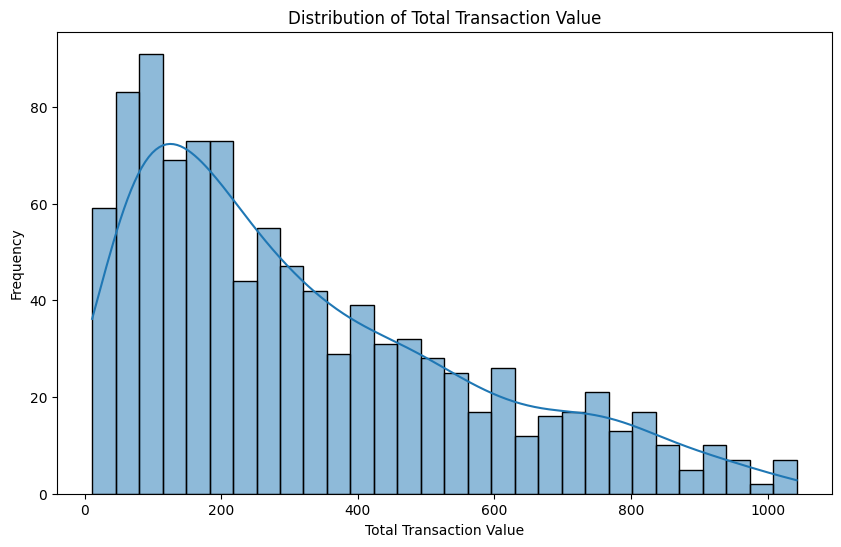

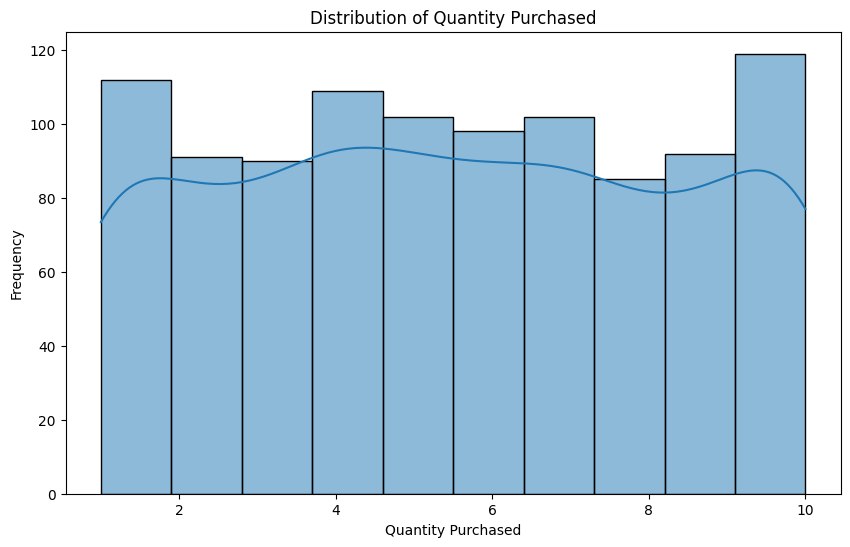

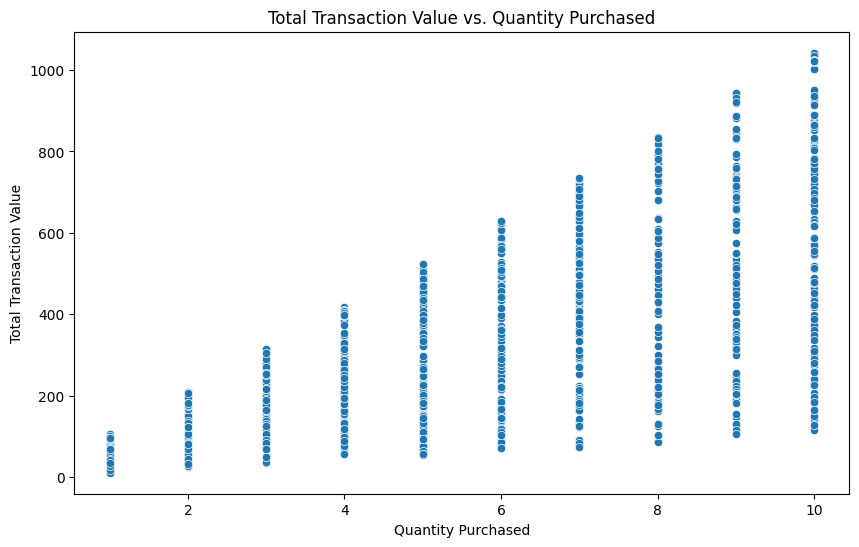

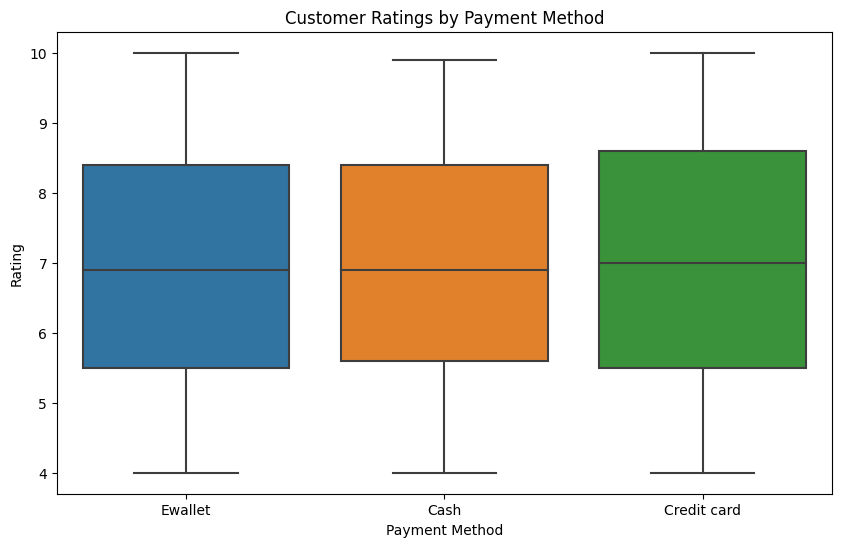

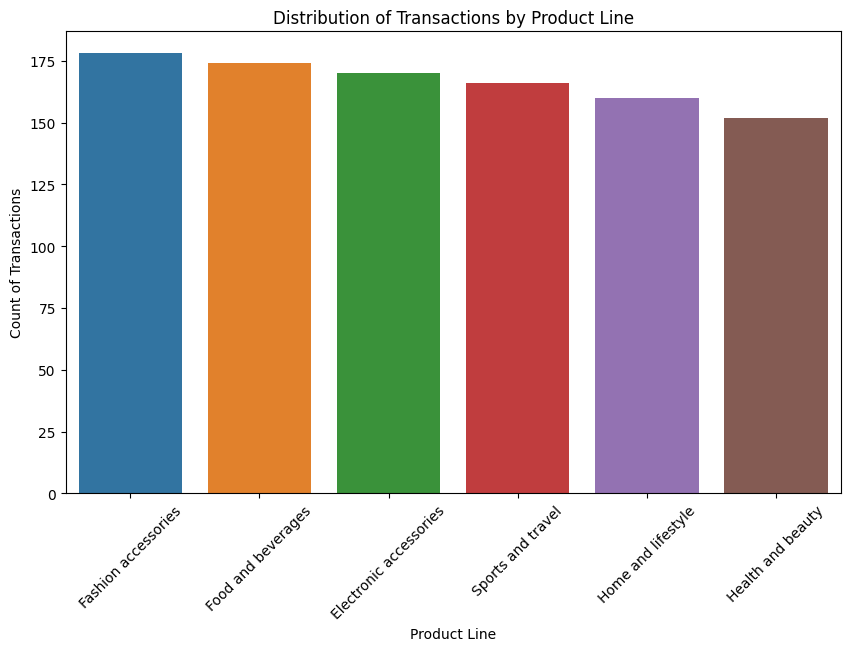

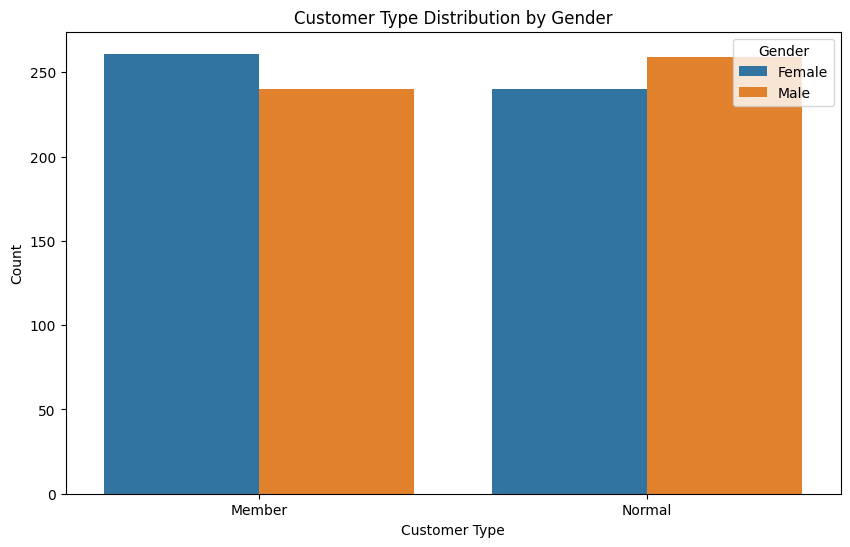

In [5]:

# Visualizations

# Distribution of Total Transaction Value
plt.figure(figsize=(10, 6))
sns.histplot(data['Total'], kde=True, bins=30)
plt.title('Distribution of Total Transaction Value')
plt.xlabel('Total Transaction Value')
plt.ylabel('Frequency')
plt.show()

# Distribution of Quantity Purchased
plt.figure(figsize=(10, 6))
sns.histplot(data['Quantity'], kde=True, bins=10)
plt.title('Distribution of Quantity Purchased')
plt.xlabel('Quantity Purchased')
plt.ylabel('Frequency')
plt.show()

# Transaction Total vs. Quantity (Exploring purchasing behavior)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Total', data=data)
plt.title('Total Transaction Value vs. Quantity Purchased')
plt.xlabel('Quantity Purchased')
plt.ylabel('Total Transaction Value')
plt.show()

# Customer Ratings by Payment Method
plt.figure(figsize=(10, 6))
sns.boxplot(x='Payment', y='Rating', data=data)
plt.title('Customer Ratings by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Rating')
plt.show()

# Distribution of Transactions by Product Line
plt.figure(figsize=(10, 6))
sns.countplot(x='Product line', data=data, order=data['Product line'].value_counts().index)
plt.title('Distribution of Transactions by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Count of Transactions')
plt.xticks(rotation=45)
plt.show()

# Customer Type distribution by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer type', hue='Gender', data=data)
plt.title('Customer Type Distribution by Gender')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()
    

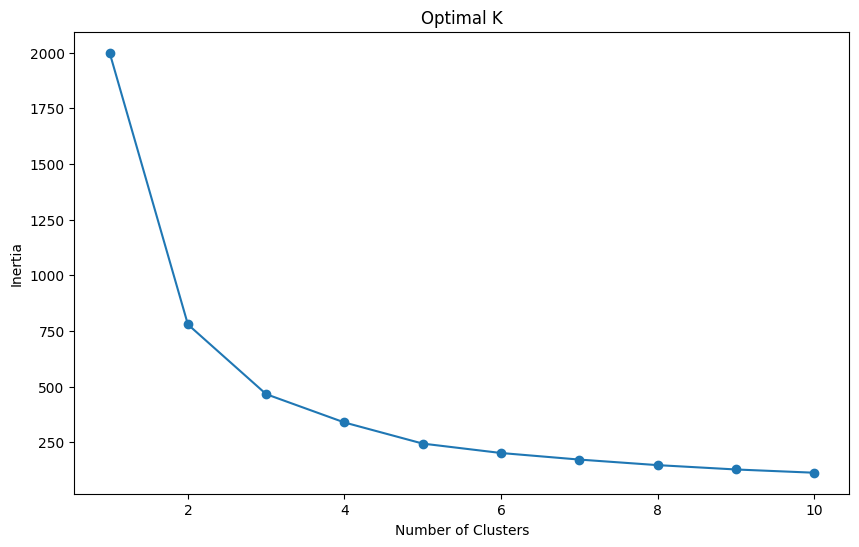

0.4354462419639329

In [9]:

# Feature selection for clustering (using Total and Quantity)
features = data[['Total', 'Quantity']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Elbow method to determine the optimal number of clusters for K-means
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init = 10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, let's try K=4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init = 10)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Silhouette score to evaluate the clustering quality
sil_score = silhouette_score(scaled_features, data['KMeans_Cluster'])
sil_score
    

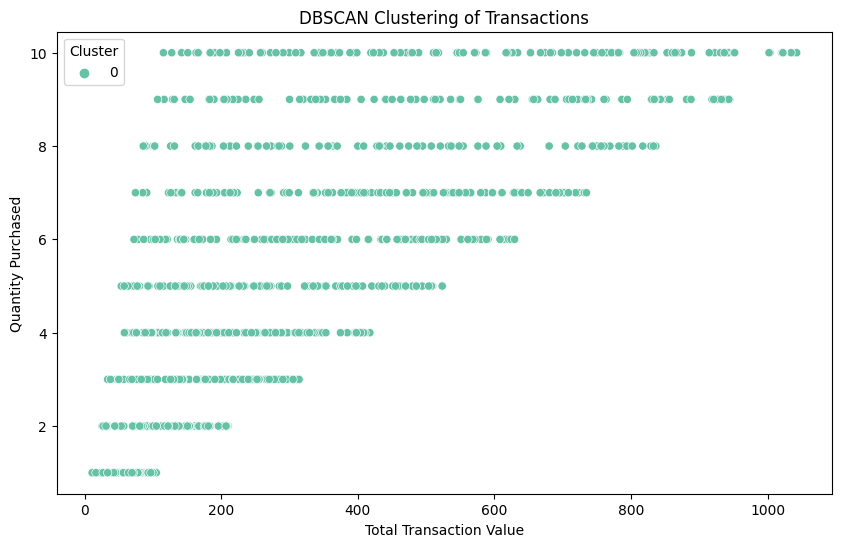

0

In [10]:

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

# Plot DBSCAN results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total', y='Quantity', hue='DBSCAN_Cluster', data=data, palette='Set2', marker='o')
plt.title('DBSCAN Clustering of Transactions')
plt.xlabel('Total Transaction Value')
plt.ylabel('Quantity Purchased')
plt.legend(title='Cluster')
plt.show()

# Evaluate the number of outliers (-1 indicates noise in DBSCAN)
outliers_count = (data['DBSCAN_Cluster'] == -1).sum()
outliers_count
    